- **Tasks:**

  1. Data sourcing and sentiment analysis

      i. EDA (Exploratory Data Analysis) & Data Cleaning
      
      ii. Text preprocessing
      
      iii. Feature extraction

      iv. Training text classification model


## Task1: Data sourcing and sentiment analysis

- Import necessary libraries

In [51]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

from collections import Counter


import warnings
warnings.simplefilter("ignore")

In [52]:
# Downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

- Utility API's

In [53]:
# Find Missing Value percentage, and round of the value to 3 decimal values
def get_missing_value_percentage(X):
  percent_missing = round((X.isnull().sum() / X.isnull().count()*100),3).to_frame('missing_percentage').sort_values('missing_percentage',ascending = False)
  return percent_missing

### 1.1 EDA &  Data Cleaning

In [54]:
ebuss_df = pd.read_csv("sample.csv")
ebuss_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557


In [55]:
# shape of Dataset
ebuss_df.shape

(30000, 14)

In [56]:
ebuss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
dtypes: int64(1), object(13)
memory usage: 3.2+ MB


In [57]:
# Number of Unique categories
len(ebuss_df['categories'].unique())

270

In [58]:
valuecount = ebuss_df['categories'].value_counts()
valuecount[valuecount > 1000]

categories
Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Clean

In [59]:
# Number of Unique users who has written review
len(ebuss_df['reviews_username'].unique())

24915

- out of 30000 records that are present, it has data for 24915 users, and for 270 different categories of data.

In [60]:
# Get the count by username
ebuss_df['reviews_username'].value_counts()

reviews_username
byamazon customer    41
mike                 41
chris                32
lisa                 16
rick                 15
                     ..
mommyshappy8714       1
eyo                   1
anonymous8589         1
jazzymom              1
ramona831             1
Name: count, Length: 24914, dtype: int64

In [61]:
# Calculate missing value percentage
percent_missing = get_missing_value_percentage(ebuss_df)
percent_missing.head(10)

,missing_percentage
reviews_userProvince,99.433
reviews_userCity,93.570
reviews_didPurchase,46.893
reviews_doRecommend,8.567
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
id,0.000
brand,0.000


#### Observation:

- `reviews_userProvince`: This column has > 99% missing values. So its not useful for analysis, and this column can be dropped.
- `reviews_userCity`: This column has > 93% missing values. So its not useful for analysis, and this column can be dropped.
- `reviews_didPurchase`: This column has > 46% missing values. So its not useful for analysis, and this column can be dropped.

In [62]:
columns_to_drop = ['reviews_userProvince','reviews_userCity','reviews_didPurchase']

In [63]:

ebuss_df.drop(columns=columns_to_drop,inplace=True)

In [64]:
ebuss_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557


In [65]:
# Calculate missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_df)
percent_missing.head(10)

,missing_percentage
reviews_doRecommend,8.567
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
id,0.000
brand,0.000
categories,0.000
name,0.000
reviews_text,0.000


<Figure size 1000x500 with 0 Axes>

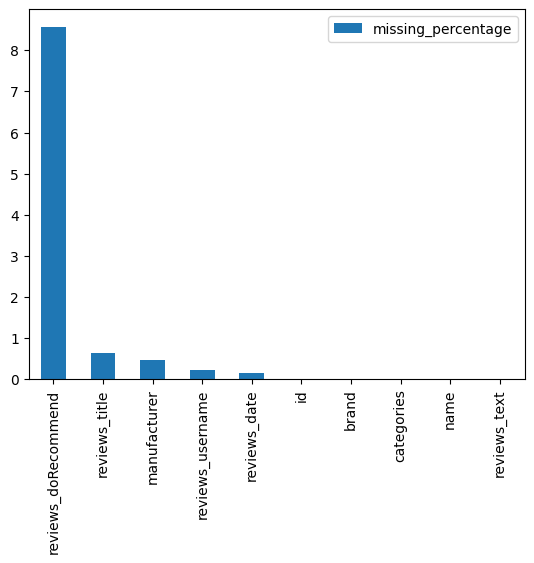

In [66]:
plt.figure(figsize=(10,5))
percent_missing.head(10).plot(kind='bar')
plt.show()

## We can see reviews_doRecommend highest number of missing values

In [67]:
# Checking for 'reviews_doRecommend' column
ebuss_df['reviews_doRecommend'].value_counts()

reviews_doRecommend
True     25880
False     1550
Name: count, dtype: int64

In [68]:
# Calculate the % of positive vs negative classes
round(ebuss_df['reviews_doRecommend'].value_counts(normalize=True) * 100,3)

reviews_doRecommend
True     94.349
False     5.651
Name: proportion, dtype: float64

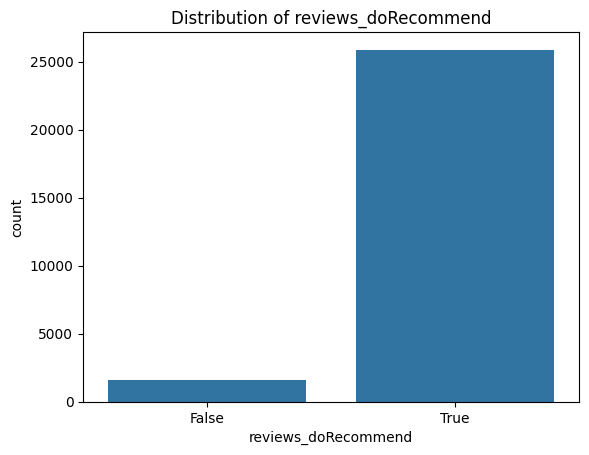

In [69]:
fig, ax = plt.subplots()  # Create a Matplotlib figure and axes
sns.countplot(x='reviews_doRecommend', data=ebuss_df, ax=ax)
plt.title('Distribution of reviews_doRecommend')  # Add a title
plt.show()  # Display the Matplotlib figure


#### Observation:

- >94% of the values for `reviews_doRecommend` field is True, and data is skewed in this case. As majority of the values are positive, this will not add much value to final analysis, and this field can be dropped.

In [70]:
ebuss_df.drop(columns=['reviews_doRecommend'],inplace=True)

In [71]:
# Calculate missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_df)
percent_missing.head(5)

,missing_percentage
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
brand,0.000


#### Observation:

- Since `reviews_title` has only ~0.6% of missing values, which shdnt impact the analysis. So dropping those rows.

In [72]:
ebuss_df_clean = ebuss_df.dropna(subset=['reviews_title'])
ebuss_df_clean.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the...,Just Awesome,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part...,Good,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,I read through the reviews on here before look...,Disappointed,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel cau...,Irritation,walker557


In [73]:
# Calculate missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_df_clean)
percent_missing.head(5)

,missing_percentage
manufacturer,0.473
reviews_username,0.208
reviews_date,0.154
id,0.000
brand,0.000


In [74]:
ebuss_df_clean['reviews_username'].fillna('others',inplace=True)

In [75]:
# Re-calculating missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_df_clean)
percent_missing.head(5)

,missing_percentage
manufacturer,0.473
reviews_date,0.154
brand,0.000
id,0.000
categories,0.000


In [76]:
# Calculate the categories of different manufacturers
round(ebuss_df_clean['manufacturer'].value_counts(normalize=True) * 100,3)

manufacturer
Clorox               28.801
Test                 11.204
AmazonUs/CLOO7        6.872
L'oreal Paris         4.152
Walt Disney           3.842
                      ...  
Unfi                  0.003
LDR                   0.003
Stanley Hardware      0.003
KeHE Distributors     0.003
Advanced Beauty       0.003
Name: proportion, Length: 213, dtype: float64

- As there are multiple manufacturers (213), considering the top 95% of manufacturers, and tagging the rest of the manufacturers as others.

In [77]:
# cumulative percentage is calculated for given column
def get_columns_with_cumfreq(df, column_name,threshold):
    df_cat_freq = df[column_name].value_counts()
    df_cat_freq = pd.DataFrame({'column':df_cat_freq.index, 'value':df_cat_freq.values})
    #print(df_cat_freq.head(50))
    df_cat_freq['perc'] = df_cat_freq['value'].cumsum()/df_cat_freq['value'].sum()
    return list(df_cat_freq.loc[df_cat_freq['perc']<=threshold].column)

In [78]:
top_manufacturer_list = get_columns_with_cumfreq(ebuss_df_clean,'manufacturer',0.95)
top_manufacturer_list

['Clorox',
 'Test',
 'AmazonUs/CLOO7',
 "L'oreal Paris",
 'Walt Disney',
 "Burt's Bees",
 'SONY CORP',
 'Twentieth Century Fox',
 'P&G',
 'Nexxus Beauty Products',
 'Summit Entertainment',
 'Universal',
 'Lundberg Family Farms',
 'Clear',
 'Hoover',
 'Windex',
 'Avery Dennison',
 'Aveeno Baby',
 'Esselte Corporation',
 'Tostitos',
 '1200',
 'Frito-Lay',
 'TIME WARNER',
 'Combe Incorporated',
 'UNILEVER',
 'Reckitt Benckiser',
 'Broken Bow',
 'Lions Gate',
 'Hormel',
 'Coty brands',
 'Warner Home Video',
 'Pantene Pro-V Hair Care',
 '20th Century Fox',
 'GENERAL MILLS SALES, INC.',
 'CUISINART',
 'Vaseline',
 'Procter & Gamble Company',
 'Aussie',
 'Bounce',
 'GHP Group, Inc.',
 'Energizer Personal Care',
 'Unilever',
 'Nabisco Biscuit Company',
 'Hbo Home Video',
 'Caress',
 'Dr Pepper/Seven Up, Inc',
 'Yes To Inc.',
 'Generic',
 'Axe',
 'Tresemme',
 'Orajel']

In [79]:
len(top_manufacturer_list)

51

- As top 95% corresponds to 51 manufacturers, tagging other columns as 'others'

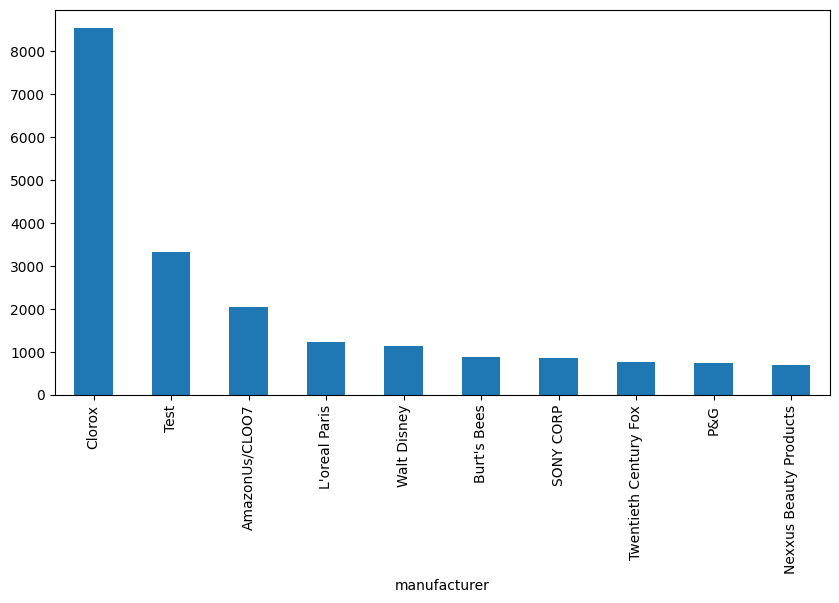

In [80]:
## Top 10 Manufacturer
plt.figure(figsize=(10,5))
ebuss_df_clean['manufacturer'].value_counts().head(10).plot(kind='bar')
plt.show()

- We can see clorox has a highest manufacturing value followed by Test and Amazon



In [81]:
# all the levels below 95 percentage are assgined to a single level called others
# get rows for levels which are not present in top_manufacturer_list
ebuss_new_df = ebuss_df_clean[~ebuss_df_clean['manufacturer'].isin(top_manufacturer_list)]
# replace the value of these levels to others
ebuss_new_df['manufacturer'] = "others"
# get rows for levels which are present in list_platform
ebuss_old_df = ebuss_df_clean[ebuss_df_clean['manufacturer'].isin(top_manufacturer_list)]
# concatenate new_df and old_df to get the final dataframe
ebuss_updated_df = pd.concat([ebuss_new_df, ebuss_old_df])

In [82]:
# Re-calculating missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_updated_df)
percent_missing.head(5)

,missing_percentage
reviews_date,0.154
id,0.000
brand,0.000
categories,0.000
manufacturer,0.000


In [83]:
#converting 'reviews_date' to date time object
ebuss_updated_df["reviews_date"] = pd.to_datetime(ebuss_updated_df["reviews_date"], errors='coerce')

In [84]:
ebuss_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29810 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                29810 non-null  object             
 1   brand             29810 non-null  object             
 2   categories        29810 non-null  object             
 3   manufacturer      29810 non-null  object             
 4   name              29810 non-null  object             
 5   reviews_date      29228 non-null  datetime64[ns, UTC]
 6   reviews_rating    29810 non-null  int64              
 7   reviews_text      29810 non-null  object             
 8   reviews_title     29810 non-null  object             
 9   reviews_username  29810 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 2.5+ MB


- As there are < 0.1 % of records where NA values are present for reviews_date column, dropping those rows.

In [85]:
ebuss_updated_df = ebuss_updated_df[~ ebuss_updated_df['reviews_date'].isna()]

In [86]:
# Re-calculating missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_updated_df)
percent_missing.head(5)

,missing_percentage
id,0.0
brand,0.0
categories,0.0
manufacturer,0.0
name,0.0


#### Note:

- Provided data has clearly class imbalance, as positive class has 88.7%. So we need to ensure class imbalance issue is addressed. [SMOTE technique will be used to address the same during model building].

In [87]:
# Re-calculating missing value percentage again
percent_missing = get_missing_value_percentage(ebuss_updated_df)
percent_missing.head()

,missing_percentage
id,0.0
brand,0.0
categories,0.0
manufacturer,0.0
name,0.0


- All the null values are addressed.

### 1.2. Text Preprocessing:

In [88]:
# Check the shape of updated df
ebuss_updated_df.shape

(29228, 10)

- Check the review_rating field to understand the distribution

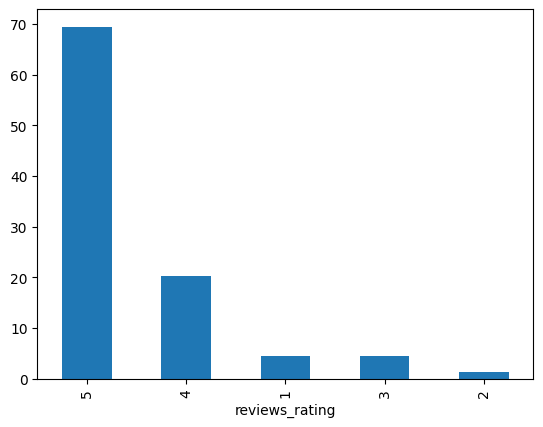

In [89]:
percent_val = 100 * ebuss_updated_df['reviews_rating'].value_counts()/len(ebuss_updated_df)
percent_val.plot.bar()
plt.show()

In [90]:
# Preprocess text fields
def preprocess(document):
  # 1. Change the document to lower case
  document = document.lower()

  # 2. Remove punctuation and words containing numbers
  document = re.sub("[^\sA-z]","",document)

  # 3. Tokenize the words
  words = word_tokenize(document)

  # 4. Remove the stop words
  words = [word for word in words if word not in stopwords.words("english")]

  # 5. Remove words with 0 or 1 letter
  words = [w for w in words if len(w) > 1]

  # 6. join
  document = " ".join(words)
  return(document)


In [91]:
# using spacy
import spacy
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

In [92]:
# Applying Lemmatization
def lemmatize_text(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)

In [93]:
ebuss_updated_df["reviews_preprocess_text"] = ebuss_updated_df[['reviews_title', 'reviews_text']].agg(' '.join, axis=1).str.lstrip('. ')

In [94]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [95]:
#Apply Preprocessing
ebuss_updated_df["reviews_preprocess_text"] = ebuss_updated_df["reviews_preprocess_text"].apply(preprocess)

In [96]:
# Concatenating review title and review text which can be used for further analysis analysis
ebuss_updated_df["reviews_complete_text"] = ebuss_updated_df["reviews_preprocess_text"].apply(lemmatize_text)


In [97]:
ebuss_updated_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,reviews_preprocess_text,reviews_complete_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",others,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the...,Just Awesome,joshua,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part...,Good,dorothy w,good good flavor review collected part promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",others,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,I read through the reviews on here before look...,Disappointed,rebecca,disappointed read reviews looking buying one c...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",others,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,irritation husband bought gel us gel caused ir...,irritation husband buy gel us gel cause irrita...


- `reviews_complete_text` field has some null values after lemmatization. Fill all null values same as reviews_text.

In [98]:
ebuss_updated_df.shape

(29228, 12)

In [99]:
ebuss_updated_df['reviews_complete_text'].fillna(ebuss_updated_df['reviews_text'],inplace=True)

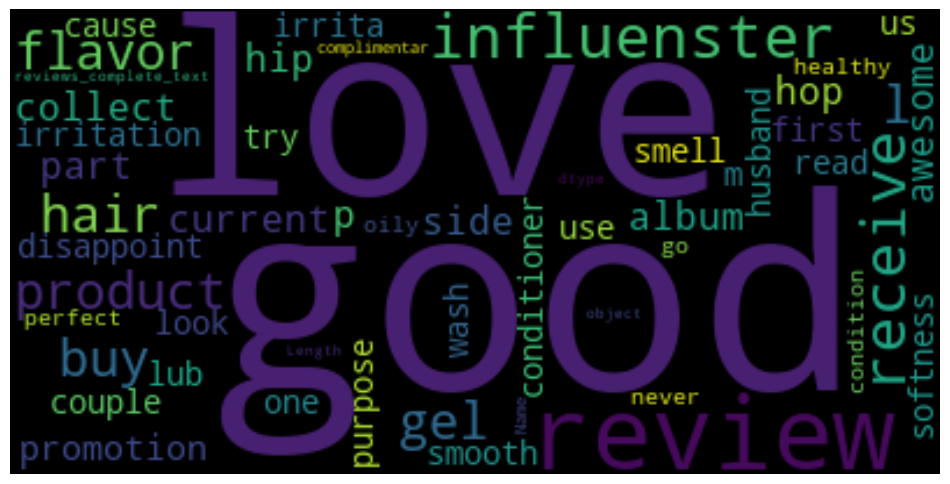

In [100]:
# Create WordCloud to check on Top 50 words
wordcloud = WordCloud(max_words=80, random_state=42)
wordcloud.generate(str(ebuss_updated_df['reviews_complete_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

\- Looks all the wordcloud contains both postive, negative words while most of the words are positive

In [101]:
words_per_review = ebuss_updated_df['reviews_complete_text'].apply(lambda x: len(x.split(" ")))
print('Average words per Review:', round(words_per_review.mean(),2))

Average words per Review: 19.64


- There are approximately 20 words per review on an average

In [102]:
from textblob import TextBlob

def classify_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  
    
    if sentiment_score > 0:
        sentiment = "Positive"
    elif sentiment_score < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    return sentiment, sentiment_score

ebuss_updated_df['Sentiment'], ebuss_updated_df['Sentiment_Score'] = zip(*ebuss_updated_df['reviews_complete_text'].apply(classify_sentiment))


ebuss_updated_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,reviews_preprocess_text,reviews_complete_text,Sentiment,Sentiment_Score
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",others,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the...,Just Awesome,joshua,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...,Positive,0.257143
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part...,Good,dorothy w,good good flavor review collected part promotion,good good flavor review collect part promotion,Positive,0.700000
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,good good flavor,good good flavor,Positive,0.700000
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",others,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,I read through the reviews on here before look...,Disappointed,rebecca,disappointed read reviews looking buying one c...,disappoint read review look buy one couple lub...,Positive,0.027002
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",others,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,irritation husband bought gel us gel caused ir...,irritation husband buy gel us gel cause irrita...,Neutral,0.000000


In [103]:
ebuss_updated_df['Sentiment'].isnull().nlargest(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Sentiment, dtype: bool

- As overall feedback is skewed and is positive, for missing values for 'Sentiment' column it is being updated as Positive.

#### Observation:

- Since `reviews_username` has only ~0.2% of missing values, so for this case, the missing values are imputed as 'others'.

In [104]:
ebuss_updated_df['Sentiment'].fillna('Positive', inplace=True)

In [105]:
# creating a new feature 'user_sentiment_flag'
# 'Positive' sentiments will be marked as "1" and  'Negative' sentiments will be marked as "1"
ebuss_updated_df['user_sentiment_flag'] = ebuss_updated_df['Sentiment'].apply(lambda x: 1 if x == "Positive" else 0)

In [106]:
# Calculate the % of positive vs negative classes
round(ebuss_updated_df['Sentiment'].value_counts(normalize=True) * 100,3)

Sentiment
Positive    92.353
Negative     5.389
Neutral      2.258
Name: proportion, dtype: float64

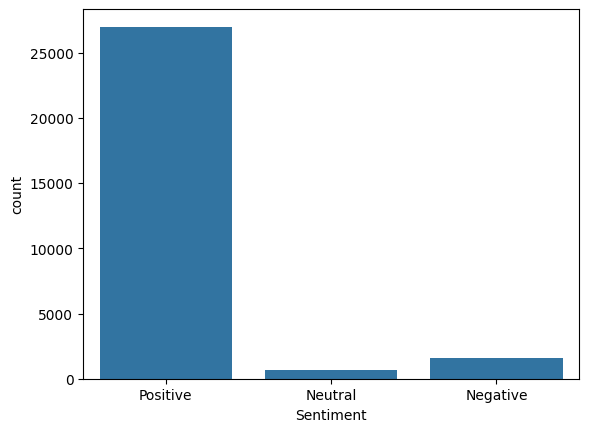

In [107]:
sns.countplot(data=ebuss_updated_df, x='Sentiment')
plt.show()

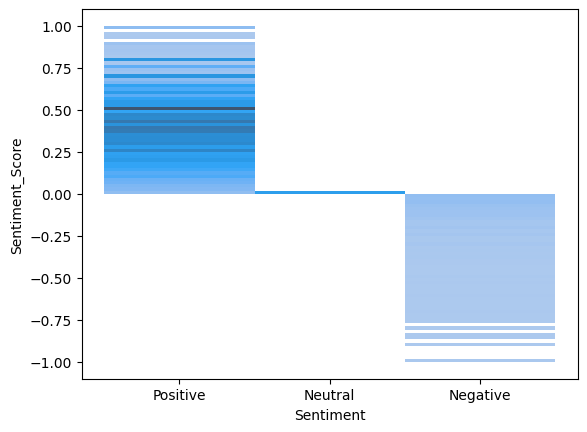

In [108]:
sns.histplot(data=ebuss_updated_df, x='Sentiment', y='Sentiment_Score')
plt.show()

In [109]:
negative = ebuss_updated_df[ebuss_updated_df['Sentiment']=='Negative']
positive = ebuss_updated_df[ebuss_updated_df['Sentiment']=='Positive']


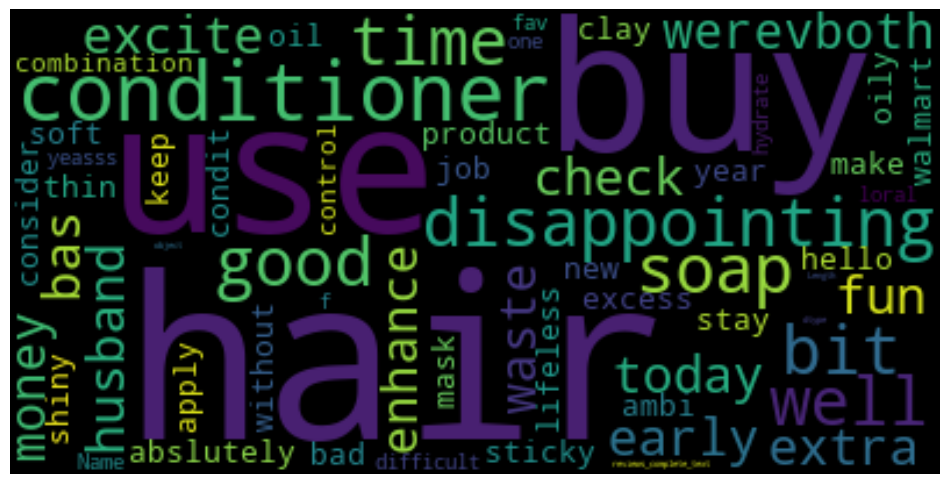

In [110]:
wordcloud = WordCloud(max_words=100, random_state=42)
wordcloud.generate(str(negative['reviews_complete_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

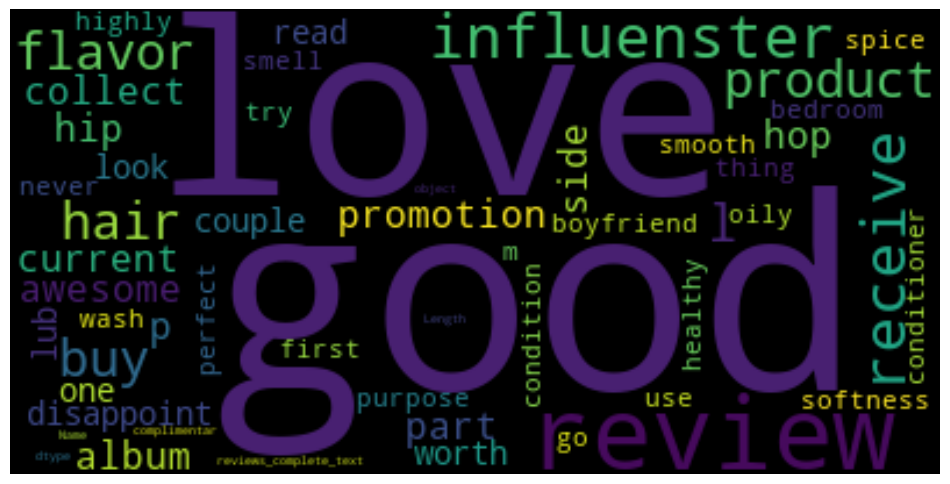

In [111]:
wordcloud = WordCloud(max_words=100, random_state=42)
wordcloud.generate(str(positive['reviews_complete_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Train Test Split

In [112]:

# Creating TF-IDF vectorizer, for model building
# Considering all unigram, bigram, trigram words+v gtv vt
vectorizer = TfidfVectorizer(max_df=0.95,min_df=5,
                             stop_words='english',
                             tokenizer= word_tokenize,
                             ngram_range=(1,3))

### 1.3. Feature Extraction

In [113]:
# Fitting the TF-IDF vectorizer on the training set
X_tfidf = vectorizer.fit_transform(ebuss_updated_df['reviews_complete_text'])
y = ebuss_updated_df['user_sentiment_flag']

In [114]:

# check shape after vectorization
print(X_tfidf.shape)
print(y.shape)

(29228, 20679)
(29228,)


- To address class imbalance problem, applying SMOTE Technique

In [115]:
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42, test_size=0.2)

In [116]:
print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape =", y_test.shape)

X_train shape = (23382, 20679)
X_test shape = (5846, 20679)
y_train shape = (23382,)
y_test shape = (5846,)


### 1.4. Training Classification Model

### Model Building

In [117]:
class ModelFactory:
  def __init__(self,model, model_name, X_train,y_train,X_test,y_test):
    self.model = model
    self.model_name = model_name
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    self.train_metrics = []
    self.test_metrics = []

  def train(self):
    self.model.fit(self.X_train,self.y_train)
    return self.model.predict(self.X_train)

  def test(self):
    return self.model.predict(self.X_test)

  # This API is added for model load cases
  def set_test_data(self,test_data):
    self.X_test = test_data

  def predict(self):
    return self.model.predict(self.X_test)


  def evaluate_metrics_train(self,y_pred):
    accuracy = round(accuracy_score(self.y_train, y_pred),2)
    precision = round(precision_score(self.y_train,y_pred),2)
    recall = round(recall_score(self.y_train,y_pred),2)
    f1 = round(f1_score(self.y_train,y_pred),2)
    auc_score = round(roc_auc_score(self.y_train,y_pred),2)
    self.train_metrics.append(accuracy)
    self.train_metrics.append(precision)
    self.train_metrics.append(recall)
    self.train_metrics.append(f1)
    self.train_metrics.append(auc_score)

    print("Train Data Metrics - ", self.model_name)
    print("="*20)
    print("Accuracy:", self.train_metrics[0])
    print("Precision:", self.train_metrics[1])
    print("Recall:", self.train_metrics[2])
    print("F1 Score:", self.train_metrics[3])
    print("AUC Score:", self.train_metrics[4])

    self.get_confusion_matrix_train(y_pred)
    return


  def evaluate_metrics_test(self,y_pred):
    accuracy = round(accuracy_score(self.y_test, y_pred),2)
    precision = round(precision_score(self.y_test,y_pred),2)
    recall = round(recall_score(self.y_test,y_pred),2)
    f1 = round(f1_score(self.y_test,y_pred),2)
    auc_score = round(roc_auc_score(self.y_test,y_pred),2)
    self.test_metrics.append(accuracy)
    self.test_metrics.append(precision)
    self.test_metrics.append(recall)
    self.test_metrics.append(f1)
    self.test_metrics.append(auc_score)

    print("Test Data Metrics - ", self.model_name)
    print("="*20)
    print("Accuracy:", self.test_metrics[0])
    print("Precision:", self.test_metrics[1])
    print("Recall:", self.test_metrics[2])
    print("F1 Score:", self.test_metrics[3])
    print("AUC Score:", self.test_metrics[4])

    self.get_confusion_matrix_test(y_pred)
    return


  def get_confusion_matrix_train(self, y_pred):
    confusion_mat = confusion_matrix(self.y_train, y_pred)
    print("="*30)
    self.plot_confusion_matrix(confusion_mat,[0,1])
    return


  def get_confusion_matrix_test(self, y_pred):
    confusion_mat = confusion_matrix(self.y_test, y_pred)
    print("="*30)
    self.plot_confusion_matrix(confusion_mat,[0,1])
    return

  def plot_confusion_matrix(self, data, labels):
      sns.set(color_codes=True)
      plt.title("Confusion Matrix")
      ax = sns.heatmap(data, annot=True, cmap="Blues", fmt=".1f")
      ax.set_xticklabels(labels)
      ax.set_yticklabels(labels)
      ax.set(ylabel="True Values", xlabel="Predicted Values")
      plt.show()
      return

  def get_train_metrics(self):
    return self.train_metrics


  def get_test_metrics(self):
    return self.test_metrics



#### Model 1: Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
# Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr_obj = ModelFactory(lr, "Logistic Regression", X_train, y_train, X_test, y_test)

Train Data Metrics -  Logistic Regression
Accuracy: 0.95
Precision: 0.94
Recall: 1.0
F1 Score: 0.97
AUC Score: 0.65


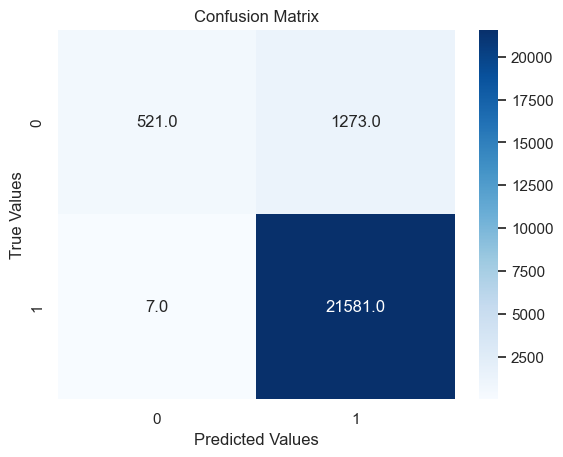

In [120]:
# Train
y_train_pred = lr_obj.train()
lr_train_reslt1 = lr_obj.evaluate_metrics_train(y_train_pred)
lr_train_reslt1

Test Data Metrics -  Logistic Regression
Accuracy: 0.94
Precision: 0.94
Recall: 1.0
F1 Score: 0.97
AUC Score: 0.59


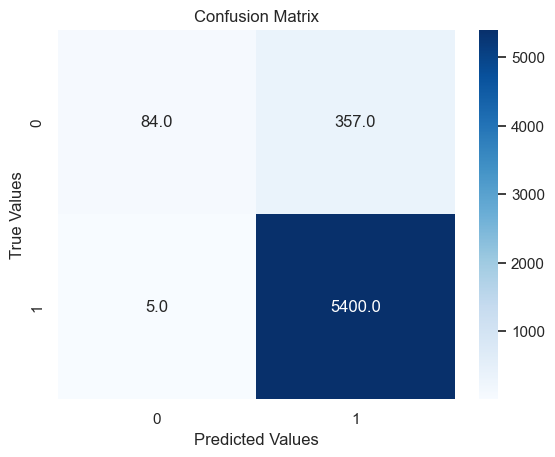

In [121]:
# Test
y_test_pred = lr_obj.test()
lr_test_reslt1 = lr_obj.evaluate_metrics_test(y_test_pred)
lr_test_reslt1

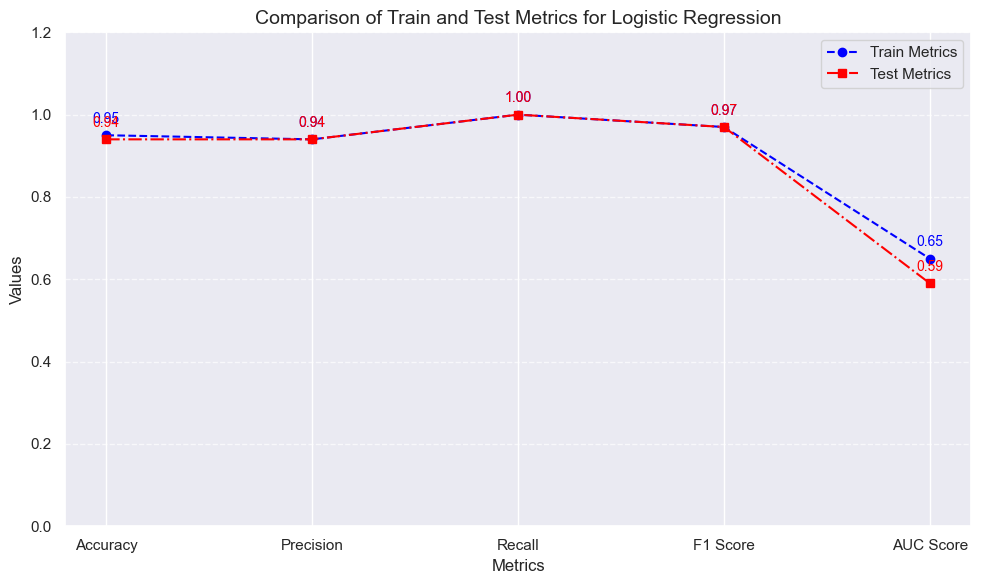

In [122]:

train_metrics = lr_obj.get_train_metrics()
test_metrics = lr_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {lr_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


In [123]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [124]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [125]:
count = Counter(y_train)
print('Before Applying SMOTE:',count)

sm = SMOTE(random_state = 42)

# transform the dataset
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

count = Counter(y_train_sm)
print('After Applying SMOTE:',count)

Before Applying SMOTE: Counter({1: 21588, 0: 1794})
After Applying SMOTE: Counter({np.int64(1): 21588, np.int64(0): 21588})


#### Model 2: Logistic Regression with Class Balancing (SMOTE Technique)

- In this case we are applying LR with class wight as balances, and max iterations as 100

In [126]:
# Logistic Regression Model with SMOTE
%time
lr_smote = LogisticRegression(random_state=42, class_weight="balanced", max_iter=100)
lr_smote_obj = ModelFactory(lr_smote, "Logistic Regression with SMOTE",
                            X_train_sm, y_train_sm, X_test, y_test)

CPU times: total: 0 ns
Wall time: 13.8 μs


Train Data Metrics -  Logistic Regression with SMOTE
Accuracy: 0.98
Precision: 1.0
Recall: 0.96
F1 Score: 0.98
AUC Score: 0.98


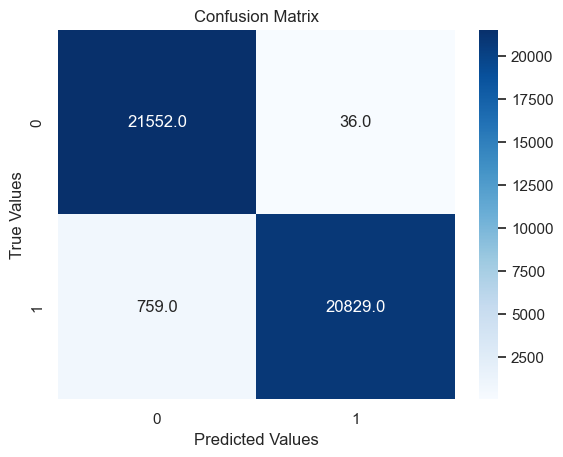

In [127]:
# Train
y_train_pred = lr_smote_obj.train()
lr_smote_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  Logistic Regression with SMOTE
Accuracy: 0.94
Precision: 0.99
Recall: 0.95
F1 Score: 0.97
AUC Score: 0.9


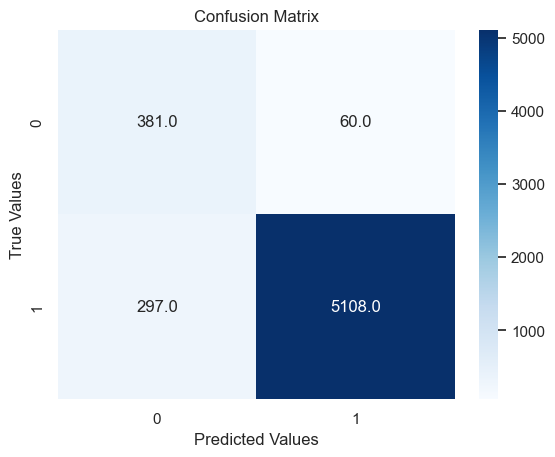

In [128]:
# Test
y_test_pred = lr_smote_obj.test()
lr_smote_obj.evaluate_metrics_test(y_test_pred)

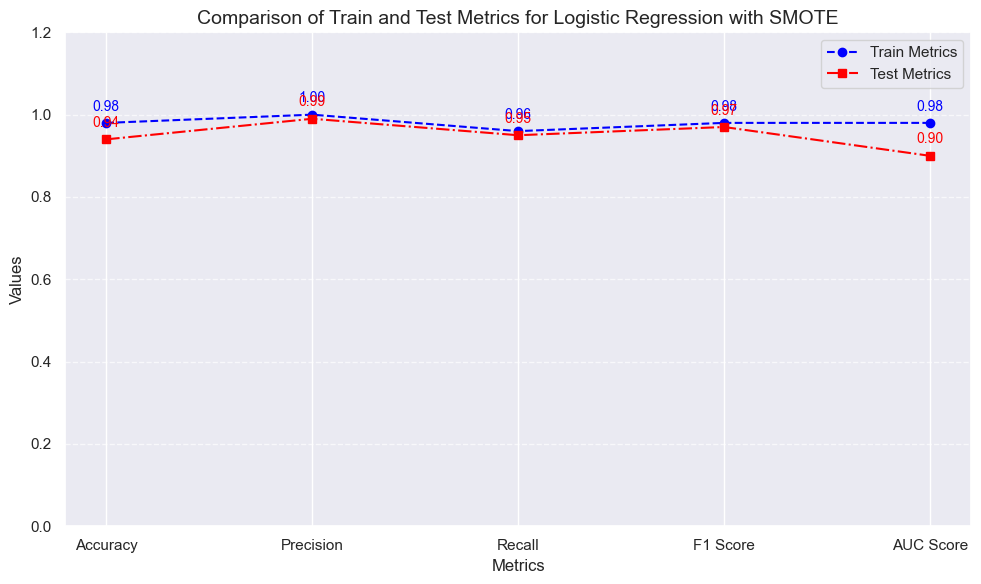

In [129]:

train_metrics = lr_smote_obj.get_train_metrics()
test_metrics = lr_smote_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {lr_smote_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


#### Model 3: Naive Bayes

In [130]:
# training the MultinomialNB model
from sklearn.naive_bayes import MultinomialNB

In [131]:
# MultiNomial NB Object
mnb = MultinomialNB()
mnb_obj = ModelFactory(mnb, "Multinomial NB", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  Multinomial NB
Accuracy: 0.95
Precision: 0.99
Recall: 0.91
F1 Score: 0.95
AUC Score: 0.95


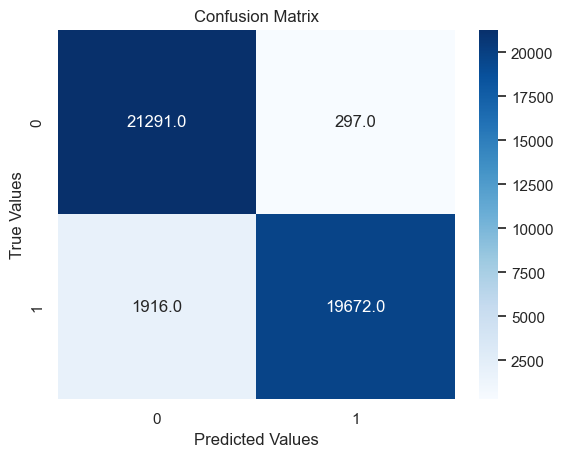

In [132]:
# Train
y_train_pred = mnb_obj.train()
mnb_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  Multinomial NB
Accuracy: 0.89
Precision: 0.98
Recall: 0.9
F1 Score: 0.94
AUC Score: 0.82


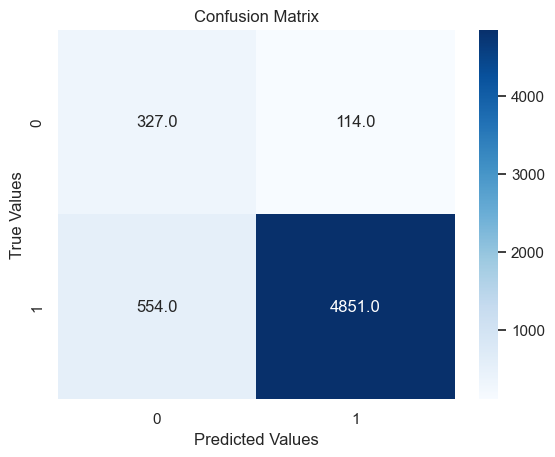

In [133]:
# Test
y_test_pred = mnb_obj.test()
mnb_obj.evaluate_metrics_test(y_test_pred)

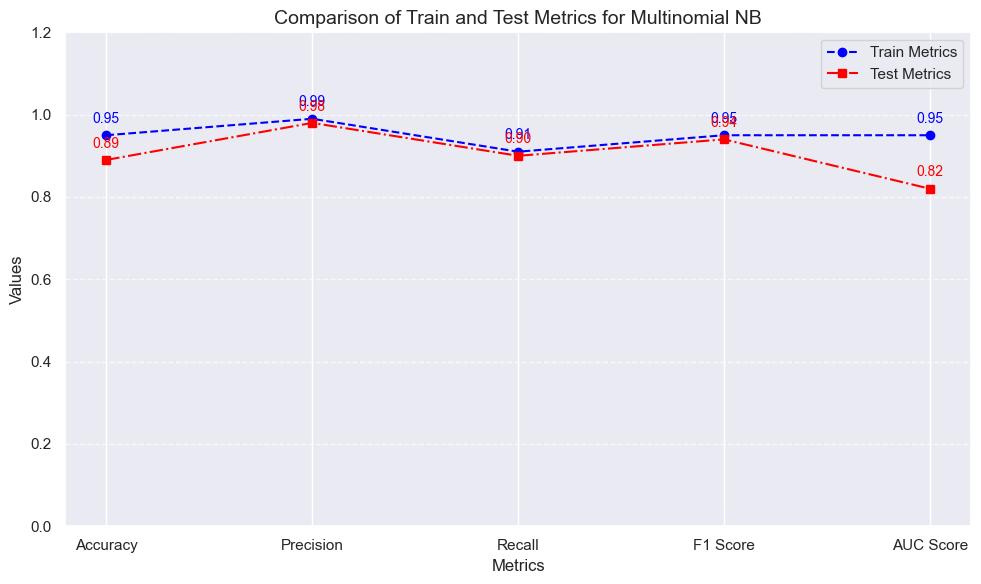

In [134]:
train_metrics = mnb_obj.get_train_metrics()
test_metrics = mnb_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {mnb_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()  


- There's a difference in train and test accuracy and auc score. This model is not good as compare to lr model

#### Model 4: XGBoost

In [135]:
import xgboost as xgb

In [136]:
# XGBoost Object
xgb_classifier = xgb.XGBClassifier(random_state=42, n_jobs=-1)
xgb_obj = ModelFactory(xgb_classifier, "XGBoost", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  XGBoost
Accuracy: 0.98
Precision: 1.0
Recall: 0.97
F1 Score: 0.98
AUC Score: 0.98


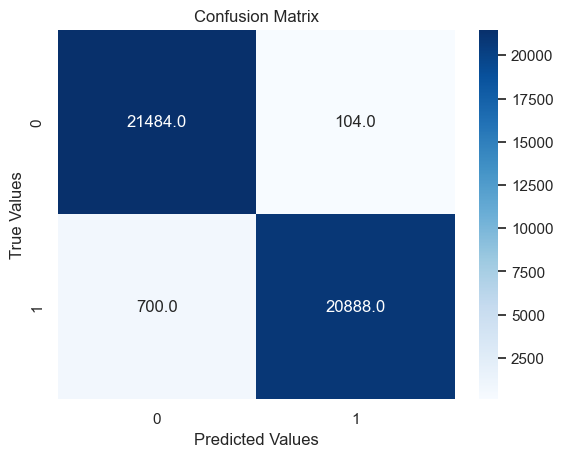

In [137]:
# Train
y_train_pred = xgb_obj.train()
xgb_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  XGBoost
Accuracy: 0.95
Precision: 0.99
Recall: 0.96
F1 Score: 0.97
AUC Score: 0.91


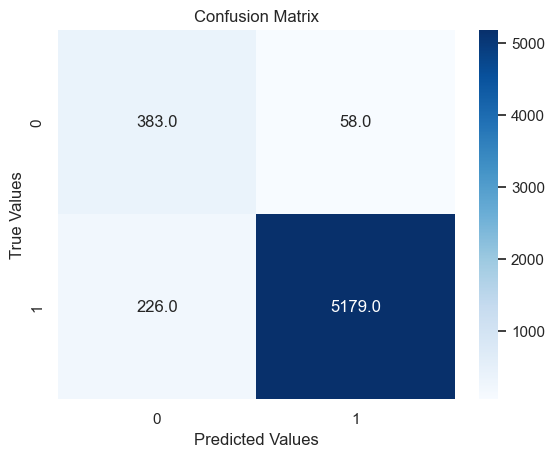

In [138]:
# Test
y_test_pred = xgb_obj.test()
xgb_obj.evaluate_metrics_test(y_test_pred)

- All the parameters looks fine where train, test score looks relatively similar, except for the AUC_ROC score of Train vs Test. So trying with hyper parameter tuning

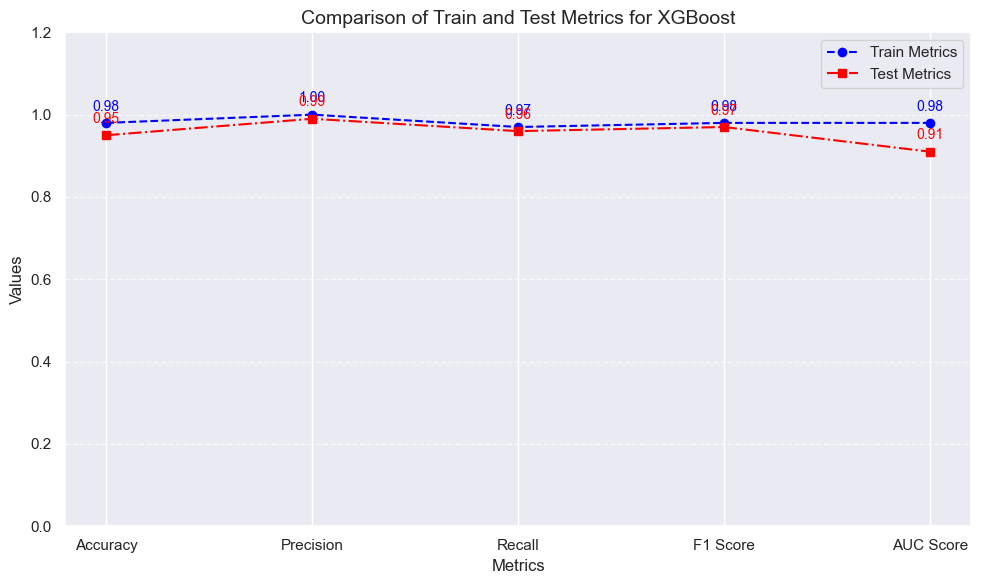

In [139]:

train_metrics = xgb_obj.get_train_metrics()
test_metrics = xgb_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {xgb_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


#### Model 5: XGBoost with HyperParameter Tuning

In [140]:
param_grid_xgb={'learning_rate': [0.001, 0.01,0.1], 'max_depth': [5, 10],
                         'n_estimators': [1, 3]}
xgb_hp_tuned = GridSearchCV(cv=5, estimator=xgb.XGBClassifier(random_state=42, n_jobs=-1),
                            param_grid=param_grid_xgb, verbose=1)
xgb_hp_tuned_obj = ModelFactory(xgb_hp_tuned, "XGBoost HP Tuned", X_train_sm, y_train_sm, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Data Metrics -  XGBoost HP Tuned
Accuracy: 0.91
Precision: 0.96
Recall: 0.86
F1 Score: 0.91
AUC Score: 0.91


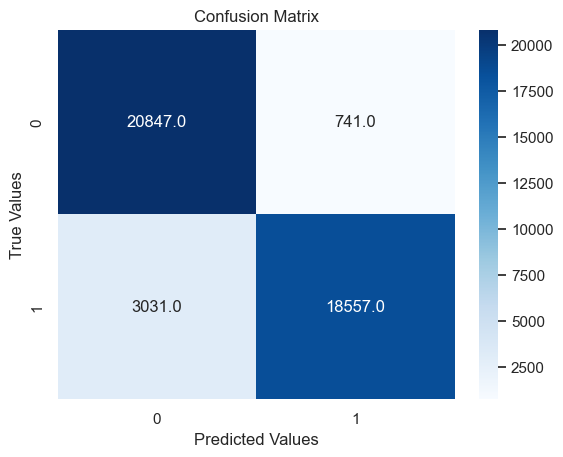

In [141]:
# Train

y_train_pred = xgb_hp_tuned_obj.train()
xgb_hp_tuned_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  XGBoost HP Tuned
Accuracy: 0.86
Precision: 0.99
Recall: 0.85
F1 Score: 0.92
AUC Score: 0.87


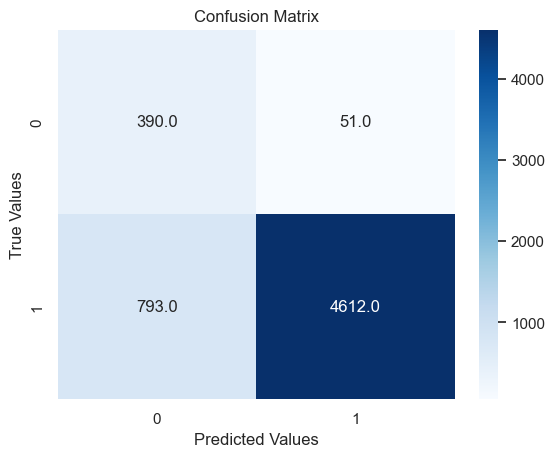

In [142]:
# Test

y_test_pred = xgb_hp_tuned_obj.test()
xgb_hp_tuned_obj.evaluate_metrics_test(y_test_pred)

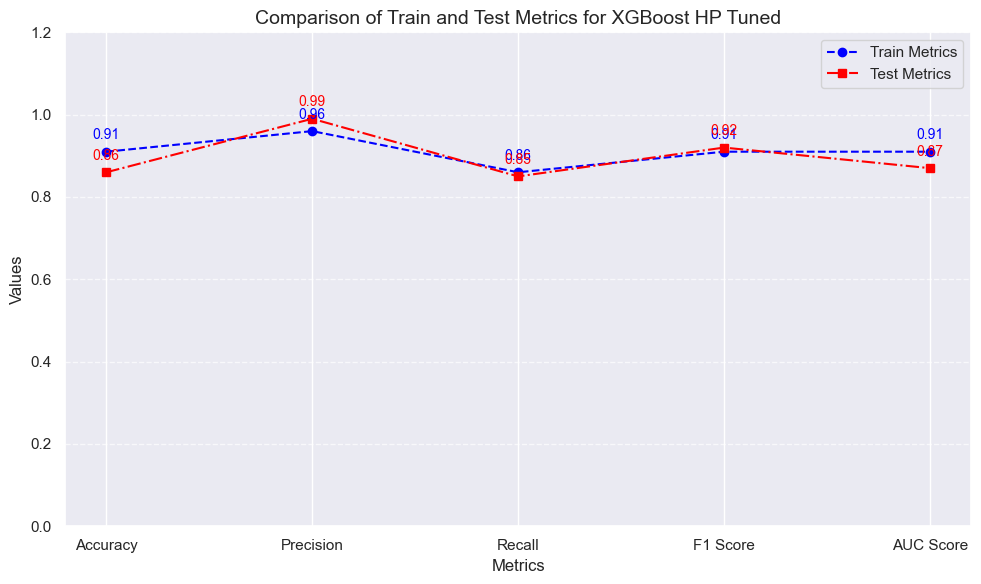

In [143]:

train_metrics = xgb_hp_tuned_obj.get_train_metrics()
test_metrics = xgb_hp_tuned_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {xgb_hp_tuned_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


#### Model 6: Random Forest

In [144]:
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [145]:
# RandomForest Classifier
rf_classifer = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_obj = ModelFactory(rf_classifer, "RandomForest", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  RandomForest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


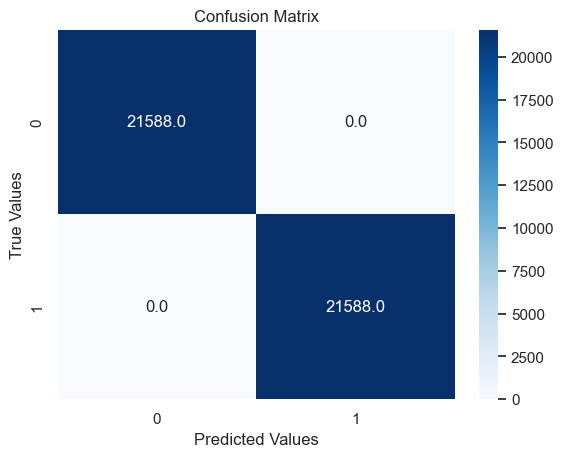

In [146]:
# Train
y_train_pred = rf_obj.train()
rf_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  RandomForest
Accuracy: 0.95
Precision: 0.97
Recall: 0.98
F1 Score: 0.97
AUC Score: 0.78


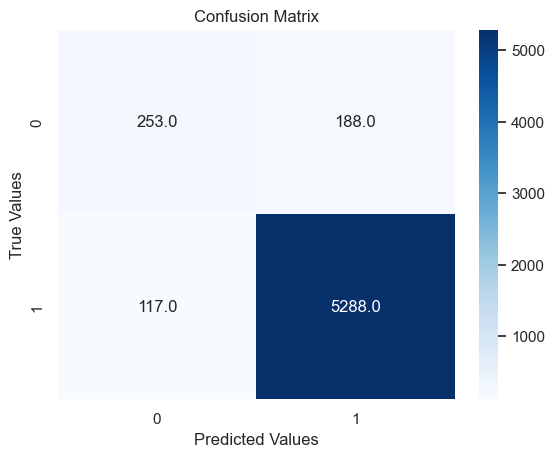

In [147]:
# Test
y_test_pred = rf_obj.test()
rf_obj.evaluate_metrics_test(y_test_pred)

- RandomForest is clearly overfitting, where all train parameters are 1. So trying with hyper parameter tuning.

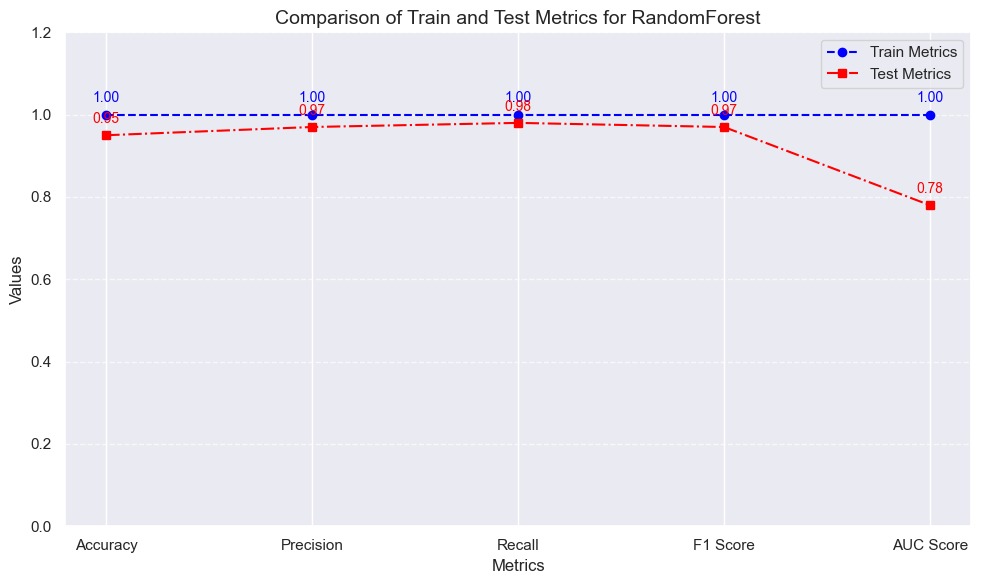

In [148]:

train_metrics = rf_obj.get_train_metrics()
test_metrics = rf_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {rf_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


#### Model 7: Random Forest with Hyperparameter Tuning

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Data Metrics -  RandomForest HP Tuned
Accuracy: 0.87
Precision: 0.84
Recall: 0.92
F1 Score: 0.88
AUC Score: 0.87


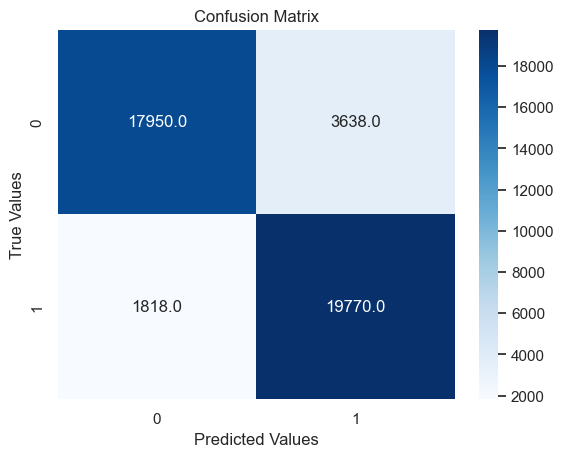

In [149]:
param_grid_rf = {'max_depth': [2, 3, 5, 10],
                 'min_samples_leaf': [5, 10, 20],
                 'n_estimators': [10, 25, 50, 100]} # Remove the extra comma and parenthesis here

rf_hp_tuned = GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42,n_jobs=-1),
                            param_grid=param_grid_rf, verbose=1)
rf_hp_tuned_obj = ModelFactory(rf_hp_tuned, "RandomForest HP Tuned", X_train_sm, y_train_sm, X_test, y_test)

# Train
y_train_pred = rf_hp_tuned_obj.train()
rf_hp_tuned_obj.evaluate_metrics_train(y_train_pred)

Test Data Metrics -  RandomForest HP Tuned
Accuracy: 0.89
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
AUC Score: 0.76


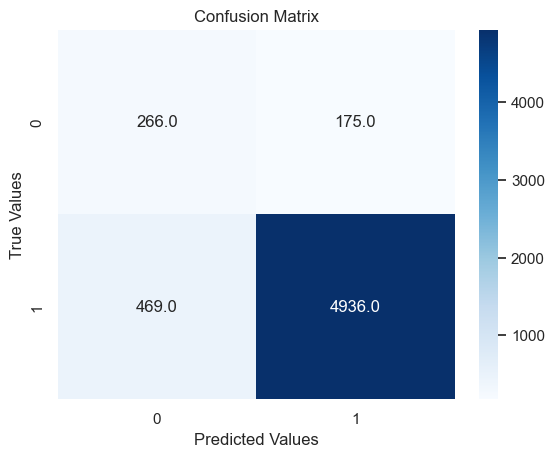

In [150]:
y_test_pred = rf_hp_tuned_obj.test()
rf_hp_tuned_obj.evaluate_metrics_test(y_test_pred)

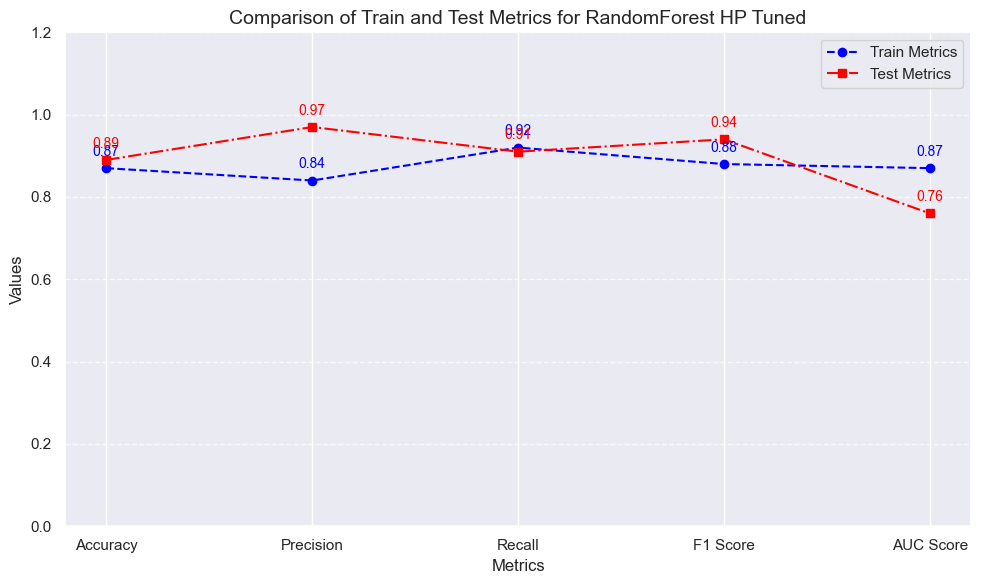

In [151]:

train_metrics = rf_hp_tuned_obj.get_train_metrics()
test_metrics = rf_hp_tuned_obj.get_test_metrics()

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']

plt.figure(figsize=(10, 6))

plt.plot(metrics_labels, train_metrics, marker='o', label='Train Metrics', color='blue', linestyle='--')

plt.plot(metrics_labels, test_metrics, marker='s', label='Test Metrics', color='red', linestyle='-.')

plt.title(f'Comparison of Train and Test Metrics for {rf_hp_tuned_obj.model_name}', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

for i, value in enumerate(train_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='blue')
for i, value in enumerate(test_metrics):
    plt.text(metrics_labels[i], value + 0.03, f'{value:.2f}', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


In [152]:
# Creating a table which contain all the metrics
column_names = ['Metric', 'LR Train', 'LR Test','LR SM Train', 'LR SM Test',
                'MNB Train','MNB Test', 'XGB Train', 'XGB Test',
                'XGB HP Train', 'XGB HP Test', 'RF Train', 'RF Test', 'RF HP Train', 'RF HP Test']

metrics_summary = {'Metric': ['Accuracy','Precision','Recall', 'F1 Score','AUC Score'],
        'LR Train': lr_obj.get_train_metrics(),
        'LR Test': lr_obj.get_test_metrics(),
        'LR SM Train': lr_smote_obj.get_train_metrics(),
        'LR SM Test': lr_smote_obj.get_test_metrics(),
        'MNB Train': mnb_obj.get_train_metrics(),
        'MNB Test': mnb_obj.get_test_metrics(),
        'XGB Train': xgb_obj.get_train_metrics(),
        'XGB Test': xgb_obj.get_test_metrics(),
        'XGB HP Train': xgb_hp_tuned_obj.get_train_metrics(),
        'XGB HP Test': xgb_hp_tuned_obj.get_test_metrics(),
        'RF Train': rf_obj.get_train_metrics(),
        'RF Test': rf_obj.get_test_metrics(),
        'RF HP Train': rf_hp_tuned_obj.get_train_metrics(),
        'RF HP Test': rf_hp_tuned_obj.get_test_metrics(),
        }

# Check if all the values in the dictionary have the same length as the 'Metric' key
for key in metrics_summary:
    if key != 'Metric' and len(metrics_summary[key]) != len(metrics_summary['Metric']):
        # If not, print the key and its length to identify the problem
        print(f"Key '{key}' has length {len(metrics_summary[key])}, expected {len(metrics_summary['Metric'])}")
        # Pad or truncate the list to match the expected length
        # Example: Pad with None values
        metrics_summary[key] = metrics_summary[key] + [None] * (len(metrics_summary['Metric']) - len(metrics_summary[key]))

metrics_df = pd.DataFrame(metrics_summary, columns = column_names)
metrics_df

,Metric,LR Train,LR Test,LR SM Train,LR SM Test,MNB Train,MNB Test,XGB Train,XGB Test,XGB HP Train,XGB HP Test,RF Train,RF Test,RF HP Train,RF HP Test
0,Accuracy,0.95,0.94,0.98,0.94,0.95,0.89,0.98,0.95,0.91,0.86,1.0,0.95,0.87,0.89
1,Precision,0.94,0.94,1.00,0.99,0.99,0.98,1.00,0.99,0.96,0.99,1.0,0.97,0.84,0.97
2,Recall,1.00,1.00,0.96,0.95,0.91,0.90,0.97,0.96,0.86,0.85,1.0,0.98,0.92,0.91
3,F1 Score,0.97,0.97,0.98,0.97,0.95,0.94,0.98,0.97,0.91,0.92,1.0,0.97,0.88,0.94
4,AUC Score,0.65,0.59,0.98,0.90,0.95,0.82,0.98,0.91,0.91,0.87,1.0,0.78,0.87,0.76


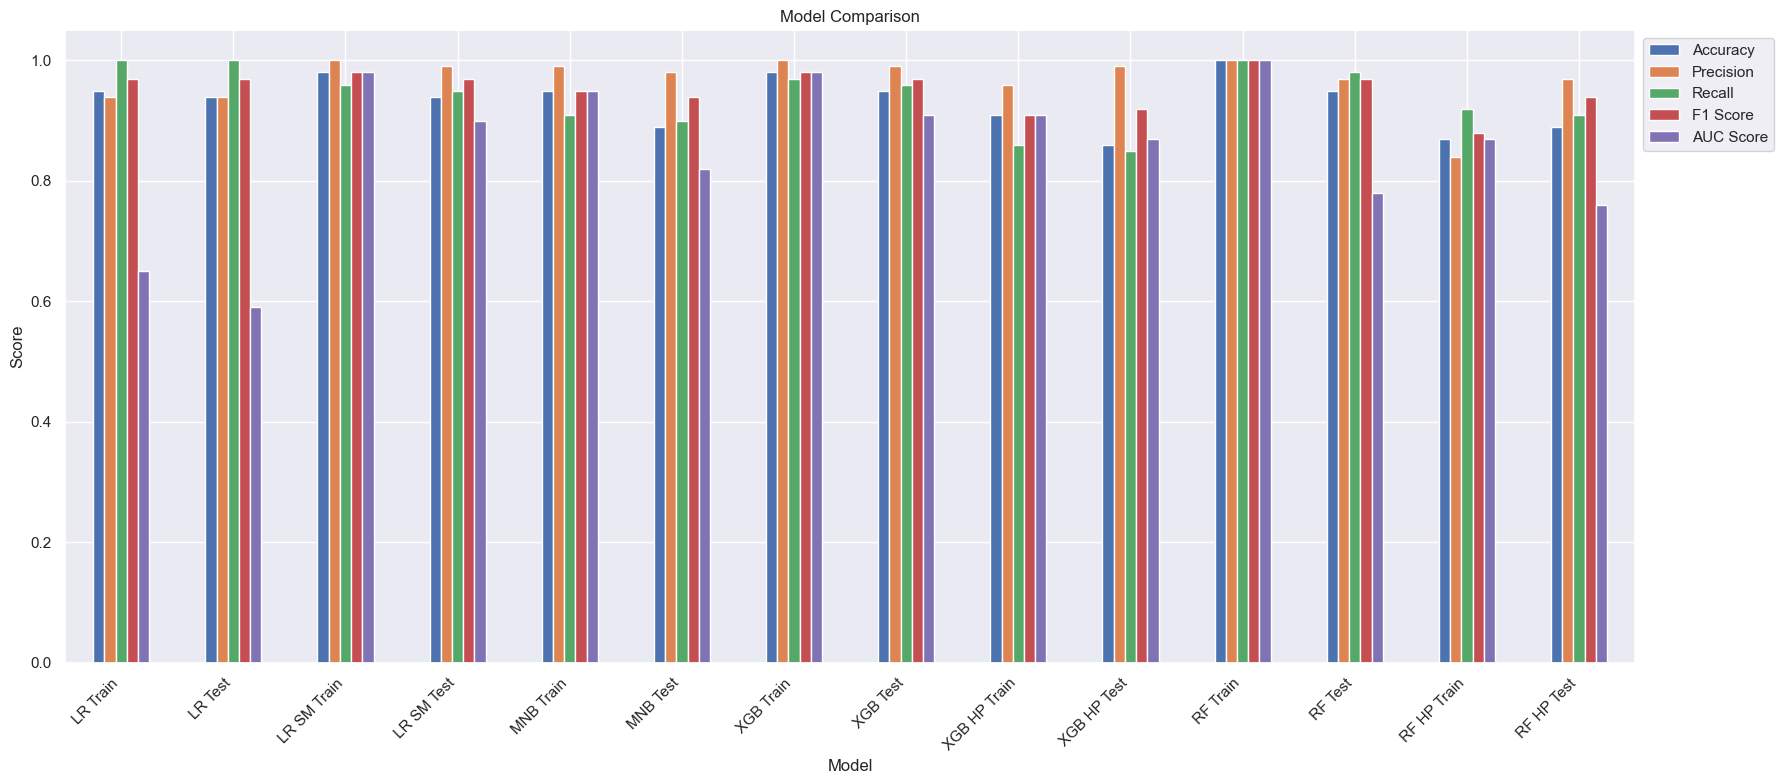

In [153]:

metrics_df_transposed = metrics_df.T
metrics_df_transposed = metrics_df_transposed.drop(metrics_df_transposed.index[0])
metrics_df_transposed.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"]

fig, ax = plt.subplots(figsize=(18, 8))

metrics_df_transposed.plot(kind='bar', ax=ax)
ax.set_title('Model Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

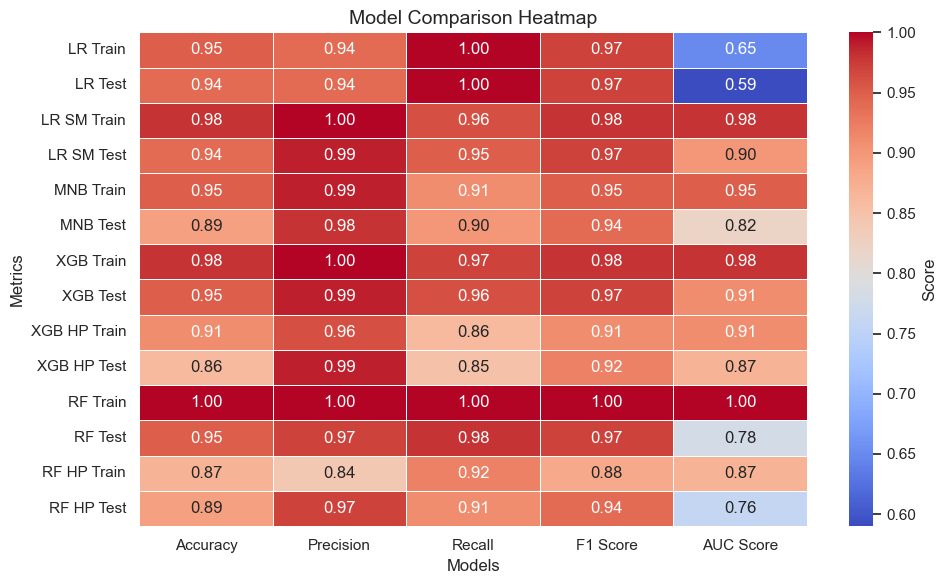

In [154]:
metrics_df_transposed = metrics_df.T
metrics_df_transposed = metrics_df_transposed.drop(metrics_df_transposed.index[0])
metrics_df_transposed.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    metrics_df_transposed.astype(float),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Score'},)

plt.title('Model Comparison Heatmap', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.tight_layout()
plt.show()


In [155]:
import joblib

# Save the trained vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")

# Save the trained model
joblib.dump(lr, "sentiment_Model.pkl")
joblib.dump(xgb_classifier, "sentiment_Model.pkl")
joblib.dump(xgb_hp_tuned, "sentiment_Model.pkl")
joblib.dump(rf_classifer, "sentiment_Model.pkl")
joblib.dump(mnb, "sentiment_Model.pkl")
joblib.dump(rf_hp_tuned, "sentiment_Model.pkl")
joblib.dump(lr_smote, "sentiment_Model.pkl")

['sentiment_Model.pkl']

# Conclusion
 - Out of 30000 records that are present, it has data for 24915 users
 - There are 213 manufacturers out of which 51 are top 95% manufacturers
 - Feedback is skewed and  as there are more positive review than negative
 - Out of all the models the best train - test accuracy and F1 score is of simple logistic regression but as the model was skewed we can say its overfitted model
 - To  overcome this problem we used the smote technique
 - Best Overall Model: RF (Random Forest) appears to be the best model for this dataset, especially for Train Accuracy (1.0) and F1 Score (0.95) on the test set. Despite some overfitting (perfect Train Accuracy), it still performs well on the test set. The F1 Score (0.95) for the test data suggests that it maintains a good balance between Precision and Recall.
 - Best Performance on Test Data: LR (Logistic Regression) performs well with Accuracy (0.90) and Recall (1.00) on the test data. It maintains high performance on F1 Score (0.95) and Precision (0.90).
 - Best Precision: LR SM (Logistic Regression with SMOTE) stands out with the highest Precision (0.98) on the training set and 0.96 on the test set, which means it minimizes false positives.
 - Best Recall: LR (Logistic Regression) has perfect Recall (1.00) on both training and testing data, indicating no false negatives.

 #### In conclusion, Random Forest (RF) stands out as the best all-around model, especially for F1 Score, but Logistic Regression (LR) excels in Recall and Precision, making it a strong competitor